<a href="https://colab.research.google.com/github/greygrease/tf-stuff/blob/main/08_introduction_to_nlp_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdunction to NLP in Tensorlfow

NLP has the goal of deriving information our of natural language (text or speech)

Commom NLP problems are sequence to sequence problems (seq2seq)

## Get helper function

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-09-13 13:08:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-09-13 13:08:16 (73.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Import series of helper function for the notebook

from helper_functions import unzip_data, create_tensorboard_callback,compare_historys, plot_loss_curves

## Get a text dataset
Kaggle's Introdunction to NLP dataset



In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2022-09-13 13:08:19--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 74.125.20.128, 108.177.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2022-09-13 13:08:19 (146 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
# Unzip data

unzip_data('nlp_getting_started.zip')

## Visualize a text dataset

In [ ]:
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
train_df_shuffled = train_df.sample(frac = 1, random_state = 42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
len(train_df)

7613

In [ ]:
len(test_df)

3263

In [ ]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[['text', 'target']][random_index : random_index + 5].itertuples():
  print(row)
  _, text, target = row
  print(f'Target: {target}', '(real disaster)' if target > 0 else '(not real disaster)')
  print(f'Text:\n,{text}\n')
  print(f'----\n')

Pandas(Index=138, text='@crobscarla your lifetime odds of dying from an airplane accident are 1 in 8015.', target=0)
Target: 0 (not real disaster)
Text:
,@crobscarla your lifetime odds of dying from an airplane accident are 1 in 8015.

----

Pandas(Index=299, text='The latest from @BryanSinger reveals #Storm is a queen in #Apocalypse @RuPaul @AlexShipppp http://t.co/oQw8Jx6rTs', target=1)
Target: 1 (real disaster)
Text:
,The latest from @BryanSinger reveals #Storm is a queen in #Apocalypse @RuPaul @AlexShipppp http://t.co/oQw8Jx6rTs

----

Pandas(Index=1556, text="@Chemical_Babe its a family emergency so I can't make it unless I have a chance to use by phone for stream.", target=0)
Target: 0 (not real disaster)
Text:
,@Chemical_Babe its a family emergency so I can't make it unless I have a chance to use by phone for stream.

----

Pandas(Index=382, text='Thousands attend a rally organized by Peace Now protesting the arson attack that took the life of an http://t.co/bvCKd9pdTi', target=

### Split data into training and validation sets


In [ ]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                              train_df_shuffled['target'].to_numpy(),
                                                              test_size = 0.1,
                                                              random_state = 42)

In [ ]:
# Check the lenghts

len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

## Convert text into numbers

Tokenisation - Direct mapping of tokens

Embedding - Create a matrix of feature vectors


### Text vectorisation

In [ ]:
train_sentences[:3]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....'],
      dtype=object)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens = None, # limit on the no of tokens (uncommon words get replaced by <OOV>)
                                     standardize = 'lower_and_strip_punctuation', # lowers text and removes punctuation
                                     split = 'whitespace', #split where the white spaces exist
                                     ngrams = None, 
                                     output_mode = 'int',
                                    output_sequence_length = None, # how long the sequences should be
                                    # pad_to_max_tokens = True
                                    )

In [ ]:
# Find the average number of tokens in thee trainint twee
ln = (sum([len(i.split()) for i in train_sentences]))/len(train_sentences)
round(ln)

15

In [ ]:
# Setup text vectorisation variables

max_vocab_length = 10000
max_length = round(ln)

text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_mode = 'int',
                                    output_sequence_length = max_length)

In [ ]:
# Fit the text vectoriser

text_vectorizer.adapt(train_sentences)

In [ ]:
sample_sentence = "There's a flood in my street!"

text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choose a random sentence from the training dataset and tokenize it 

random_sentence = random.choice(train_sentences)
print(f'OG sent:\n {random_sentence}\n')

print(f'Vectorized sent:\n {text_vectorizer([random_sentence])}')

OG sent:
 Spokane authorities say they're struggling to solve arson cases like today's on Hamilton. http://t.co/Qbs2k01WzK http://t.co/mvLZIYsGLL

Vectorized sent:
 [[8206 2188  132  723 4517    5 4576  612 1702   25 1169   11 3792    1
     1]]


In [ ]:
text_vectorizer([random_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[8206, 2188,  132,  723, 4517,    5, 4576,  612, 1702,   25, 1169,
          11, 3792,    1,    1]])>

In [ ]:
# Get the unique words in our vocabulary

words_in_vocab = text_vectorizer.get_vocabulary()

words_in_vocab[:5]


['', '[UNK]', 'the', 'a', 'in']

In [ ]:
words_in_vocab[-5:]

['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']

In [ ]:
len(words_in_vocab)

10000

In [ ]:
words_in_vocab[-1]

'paddytomlinson1'

### Create an embedding representation of words

Parameters:

      input_dim = size of vocab
      output_dim = size of the output_sequence_length
      input_length = length of the seq


In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers

vocab_length = len(words_in_vocab)

embedding = layers.Embedding(input_dim = vocab_length,
                             output_dim = 128,
                             embeddings_initializer = 'uniform',
                             input_length = max_length)

In [ ]:
# Get a random sentence from the training set

random_sentence = random.choice(train_sentences)

print(f'Original text:\n {random_sentence}\n')

print('After Embedding:')

# Embed the ranodm sent

sample_embed = embedding(text_vectorizer([random_sentence]))

print(sample_embed)

Original text:
 Picking up flattened hay men (@ Masonite in Wahpeton ND) https://t.co/Kw3vq4niJQ

After Embedding:
tf.Tensor(
[[[-0.04515135 -0.01518549  0.04039604 ...  0.00339705 -0.00649456
    0.0005693 ]
  [ 0.04000009 -0.00109376  0.04168421 ...  0.03278208 -0.04983821
    0.0191685 ]
  [ 0.02104041  0.01617186 -0.02508427 ...  0.00456551 -0.04562936
   -0.00473096]
  ...
  [ 0.01645621 -0.00589932 -0.01471175 ... -0.02511839  0.00912381
   -0.00024097]
  [ 0.01645621 -0.00589932 -0.01471175 ... -0.02511839  0.00912381
   -0.00024097]
  [ 0.01645621 -0.00589932 -0.01471175 ... -0.02511839  0.00912381
   -0.00024097]]], shape=(1, 15, 128), dtype=float32)


In [ ]:
sample_embed

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.04515135, -0.01518549,  0.04039604, ...,  0.00339705,
         -0.00649456,  0.0005693 ],
        [ 0.04000009, -0.00109376,  0.04168421, ...,  0.03278208,
         -0.04983821,  0.0191685 ],
        [ 0.02104041,  0.01617186, -0.02508427, ...,  0.00456551,
         -0.04562936, -0.00473096],
        ...,
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097],
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097],
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097]]], dtype=float32)>

In [ ]:
# Check out a singe token's embedding

sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-4.51513529e-02, -1.51854865e-02,  4.03960384e-02,  3.50998305e-02,
        7.77304173e-04,  1.63655989e-02, -3.57919931e-03,  2.73313411e-02,
       -1.93721056e-03,  2.18564756e-02,  1.43444538e-03, -8.68457556e-03,
       -1.31966360e-02,  1.74061544e-02, -4.87188473e-02,  4.12340872e-02,
        4.52918932e-03,  5.83036989e-03, -4.76378091e-02, -3.81214395e-02,
       -4.99036908e-02, -9.01661813e-04,  2.83511914e-02, -8.95595551e-03,
       -3.23984399e-02,  4.30466980e-03,  6.36097044e-03,  3.62712145e-03,
        3.31056230e-02,  1.45638026e-02, -2.97070276e-02, -4.29619215e-02,
       -3.74964252e-02, -4.10730727e-02, -2.99071670e-02, -1.19704120e-02,
       -1.72489770e-02, -3.53197083e-02, -1.49643645e-02, -5.15010208e-03,
       -2.24027280e-02, -8.51420313e-03,  3.42349522e-02,  5.60515001e-03,
        3.95355336e-02,  4.24179323e-02, -1.62373409e-02,  1.47879124e-04,
       -1.27609260e-02, -2.51847506e-02,  4.22107019

In [ ]:
random_sentence

'Picking up flattened hay men (@ Masonite in Wahpeton ND) https://t.co/Kw3vq4niJQ'

## Modelling a text dataet and running a series of experiments

    Model 0 : Naive Bayes (baseline)

    Model 1 : Feed Forward Neural Network (Dense)

    Model 2 : LSTM model (RNN)

    Model 3 : GRU model (RNN)

    Model 4 : Bidirectional LSTM model (RNN)

    Model 5 : 1D CNN

    Model 6:  Tensorflow Hub pretrained Feature Extractor (transfer learning)

    Model 7: Same as model 6 with 10% of training data

### Model 0 : Getting a baseline 


As with all machine learning experiments its important to create a baseline model for benchmarking

> Its common practice to use non_DL as baseline and use DL to see if we can improve upon it

In [ ]:
from tensorflow.python.ops.gen_random_ops import Multinomial
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline

model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()), # turn our text to numbers
    ('clf', MultinomialNB())     # model the text
])

# Fit the pipe line to the training ata

model_0.fit(train_sentences, train_labels)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluate our baseline our model

baseline_score = model_0.score(val_sentences, val_labels)

In [ ]:
print(f'Our baseline model achieves an accurayc of:{baseline_score*100}%')

Our baseline model achieves an accurayc of:79.26509186351706%


In [ ]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# Make predictions

baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

### Creating an evaluation function for our model experiments

Compare our model using the following metrics:

>Accuracy

>Precision

>Recall

>F1-Score

In [ ]:
# Function to eval 

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):

  # Accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Precison, Recall, F1-Score
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average = 'weighted')
  model_results = {'accuracy': model_accuracy,
                   'precision' : model_precision,
                   'recall': model_recall,
                   'f1': model_f1}
  return model_results

In [ ]:
baseline_results = calculate_results(y_true = val_labels,
                                     y_pred = baseline_preds)

baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 1 : A simple dense model

In [ ]:
# Create a tensorboard callback
from helper_functions import create_tensorboard_callback

# Createa a directory to save TensorBoard lofs
SAVE_DIR = 'model_logs'

In [ ]:
# Build model with Functional API
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype = tf.string) # inputs are 1 dimensinal strting
x = text_vectorizer(inputs) # nums to vectors
x = embedding(x) 
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_1 = tf.keras.Model(inputs, outputs, name='model_1_dense')


In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Compile the model

model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
# Fit the model

model_history = model_1.fit(x = train_sentences,
                          y = train_labels,
                          epochs = 5,
                          validation_data = (val_sentences, val_labels),
                          callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR,
                                                                   experiment_name = 'model_1_dense')])

Saving TensorBoard log files to: model_logs/model_1_dense/20220913-130825
Epoch 1/5
215/215 [==============================] - 5s 5ms/step - loss: 0.6094 - accuracy: 0.6916 - val_loss: 0.5357 - val_accuracy: 0.7572
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.4410 - accuracy: 0.8189 - val_loss: 0.4691 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 1s 4ms/step - loss: 0.3463 - accuracy: 0.8605 - val_loss: 0.4590 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 1s 4ms/step - loss: 0.2848 - accuracy: 0.8923 - val_loss: 0.4641 - val_accuracy: 0.7927
Epoch 5/5
215/215 [==============================] - 1s 4ms/step - loss: 0.2380 - accuracy: 0.9118 - val_loss: 0.4767 - val_accuracy: 0.7874


In [ ]:
# Check the results

model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 5ms/step - loss: 0.4767 - accuracy: 0.7874


[0.4766846001148224, 0.787401556968689]

In [ ]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[0]

array([0.4048821], dtype=float32)

In [ ]:
model_1_pred_probs.shape

(762, 1)

In [ ]:
# Convert model prediction probs to label formats

model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [ ]:
# Calcualte model 1 results
model_1_results = calculate_results(y_true = val_labels,
                            y_pred = model_1_preds)
model_1_results

{'accuracy': 78.74015748031496,
 'precision': 0.7914920592553047,
 'recall': 0.7874015748031497,
 'f1': 0.7846966492209201}

## Visualizing learned embeddings



In [ ]:
# Get the vocab from the text vectorization layer

words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab)

10000

In [ ]:
words_in_vocab[:10]

['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Get the wieght matrix of embedding layer

# These are the numerical representation of each token in our training data which have been 

embed_weights = model_1.get_layer('embedding').get_weights()[0]
embed_weights

array([[ 0.00073165,  0.01504801, -0.03425456, ..., -0.04403539,
        -0.01042281,  0.01876439],
       [ 0.04135862, -0.03945084, -0.0381194 , ...,  0.00464735,
         0.03163554,  0.02928302],
       [ 0.00684031,  0.05363134, -0.00241555, ..., -0.07082178,
        -0.04750703,  0.01448255],
       ...,
       [-0.03301444, -0.0052493 , -0.04209725, ...,  0.02028764,
         0.00308807,  0.02215792],
       [ 0.00692343,  0.05942352, -0.01975194, ..., -0.06199061,
        -0.01018393,  0.03510419],
       [-0.0372346 ,  0.06267187, -0.07451148, ..., -0.02367217,
        -0.08643329,  0.01742155]], dtype=float32)

In [ ]:
# Create embedding files
import io

out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download files from colab and upload to projector tool

try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Recurrent neural network (RNN's)

> RNN's are useful for sequence data.

> The premise of a recurrent neural network is to use the representation of a previous input to aid the representation of the later input.

> 

In [ ]:
2784 *3*4

33408

### Model 2 : LSTM

LSTM = Long Short Term 

Structur of an RNN

    Input(text) -> Tokenize -> Embedding -> Layers(RNNs/Dense) -> Output (label probability)

In [ ]:
# Create an LSTM Modle

from tensorflow.keras import layers

inputs = layers.Input(shape=(1, ), dtype = 'string')
x = text_vectorizer(inputs)
x = embedding(x)
# print(x.shape)
x = layers.LSTM(64, return_sequences = True)(x) # when you're stacking RNN cells together you need to return sequences
# print(x.shape)
x = layers.LSTM(64)(x)
# print(x.shape)
x = layers.Dense(64, activation = 'relu')(x)
# print(x.shape)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs, name = 'model_2_LSTM')

In [ ]:
# Get a summary

model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                      

In [ ]:
# Compile the model
model_2.compile(loss= 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics =['accuracy'])

In [ ]:
# Fit the model

model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       'model_2')])

Saving TensorBoard log files to: model_logs/model_2/20220913-130838
Epoch 1/5
215/215 [==============================] - 14s 20ms/step - loss: 0.2189 - accuracy: 0.9250 - val_loss: 0.5444 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.1634 - accuracy: 0.9412 - val_loss: 0.6071 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1282 - accuracy: 0.9520 - val_loss: 0.7574 - val_accuracy: 0.7808
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1076 - accuracy: 0.9584 - val_loss: 0.9243 - val_accuracy: 0.7848
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0815 - accuracy: 0.9635 - val_loss: 0.9809 - val_accuracy: 0.7808


In [ ]:
model_2_pred_prob = model_2.predict(val_sentences)

In [ ]:
model_2_pred_prob[:10]

array([[2.3730518e-03],
       [5.7842928e-01],
       [9.9988604e-01],
       [5.8599312e-02],
       [2.6671838e-05],
       [9.9545348e-01],
       [9.3895912e-01],
       [9.9989414e-01],
       [9.9978155e-01],
       [3.9918759e-01]], dtype=float32)

In [ ]:
# Convert model 2 pred probs to labels

model_2_preds = tf.squeeze(tf.round(model_2_pred_prob))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calcualte model 2 results
model_2_results = calculate_results(y_true = val_labels,
                                    y_pred = model_2_preds)

In [ ]:
model_2_results

{'accuracy': 78.08398950131233,
 'precision': 0.7856875884556138,
 'recall': 0.7808398950131233,
 'f1': 0.777681907957685}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [ ]:
model_1_results

{'accuracy': 78.74015748031496,
 'precision': 0.7914920592553047,
 'recall': 0.7874015748031497,
 'f1': 0.7846966492209201}

### Model_3: GRU

GRU - Gated Recurrent Unit
The GRU cell has similar features to an LSTM cell but has less parameters.

In [ ]:
from tensorflow.keras import layers
inputs = layers.Input(shape =(1, ), dtype = 'string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
# x = layers.LSTM(64, return_sequences = True)(x)
# x = layers.GRU(64)(x)
# x = layers.Dense(64, activation = 'relu')(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs, name = 'model_3_GRU')

In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [ ]:
# Xomile the modle

model_3.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

# Fit the model

model_3.history = model_3.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       'model_3_Gru')])

Saving TensorBoard log files to: model_logs/model_3_Gru/20220913-130901
Epoch 1/5
215/215 [==============================] - 4s 8ms/step - loss: 0.1620 - accuracy: 0.9377 - val_loss: 0.6392 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0887 - accuracy: 0.9672 - val_loss: 0.7860 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0717 - accuracy: 0.9721 - val_loss: 1.0992 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0630 - accuracy: 0.9739 - val_loss: 1.0155 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0519 - accuracy: 0.9758 - val_loss: 1.2545 - val_accuracy: 0.7782


In [ ]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

array([[4.7421377e-04],
       [7.2494876e-01],
       [9.9988055e-01],
       [9.6555941e-02],
       [6.1819919e-05],
       [9.9976522e-01],
       [9.6143889e-01],
       [9.9993181e-01],
       [9.9987459e-01],
       [9.8283893e-01]], dtype=float32)

In [ ]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))

In [ ]:
model_3_results = calculate_results(y_true = val_labels,
                                    y_pred = model_3_preds)

In [ ]:
model_3_results

{'accuracy': 77.82152230971128,
 'precision': 0.7791991586469295,
 'recall': 0.7782152230971129,
 'f1': 0.7766208088282468}

In [ ]:
model_2_results

{'accuracy': 78.08398950131233,
 'precision': 0.7856875884556138,
 'recall': 0.7808398950131233,
 'f1': 0.777681907957685}

In [ ]:
model_2_results

{'accuracy': 78.08398950131233,
 'precision': 0.7856875884556138,
 'recall': 0.7808398950131233,
 'f1': 0.777681907957685}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 4: Bidirectional RNN

Normal RNN's go from left to right to left.

Bidrectional RNN goes from right to left aswell as left to right

In [ ]:
# Bulid a bidirectional RNN in tensorflow

from tensorflow.keras import layers

inputs = layers.Input(shape = (1,), dtype = 'string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# x = layers.Bidirectional(layers.GRU(64))(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_4 =  tf.keras.Model(inputs, outputs, name = 'model_4_bidirectional')

In [ ]:
# Model 4 summary

model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [ ]:
# Compile the model

model_4.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])


In [ ]:
# Fit the model

model_4_history = model_4.fit(train_sentences, train_labels, epochs  =5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       'Model_4_Bidirectioanl')])

Saving TensorBoard log files to: model_logs/Model_4_Bidirectioanl/20220913-130911
Epoch 1/5
215/215 [==============================] - 5s 12ms/step - loss: 0.1096 - accuracy: 0.9692 - val_loss: 0.9659 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0519 - accuracy: 0.9762 - val_loss: 1.2894 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0458 - accuracy: 0.9791 - val_loss: 1.3640 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0431 - accuracy: 0.9806 - val_loss: 1.0325 - val_accuracy: 0.7533
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0454 - accuracy: 0.9796 - val_loss: 1.4620 - val_accuracy: 0.7664


In [ ]:
# Make prediction 

model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

array([[1.0680422e-04],
       [6.5519333e-01],
       [9.9995661e-01],
       [1.8717255e-01],
       [5.4288416e-06],
       [9.9859160e-01],
       [5.6148523e-01],
       [9.9997497e-01],
       [9.9994779e-01],
       [9.3294626e-01]], dtype=float32)

In [ ]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate the results of our bidirectional model

model_4_results = calculate_results(y_true = val_labels,
                                    y_pred = model_4_preds)

In [ ]:
print( model_4_results, '\n', model_3_results, '\n', model_2_results, '\n', model_1_results, '\n', baseline_results)

{'accuracy': 76.64041994750657, 'precision': 0.771218657508237, 'recall': 0.7664041994750657, 'f1': 0.7627908927491446} 
 {'accuracy': 77.82152230971128, 'precision': 0.7791991586469295, 'recall': 0.7782152230971129, 'f1': 0.7766208088282468} 
 {'accuracy': 78.08398950131233, 'precision': 0.7856875884556138, 'recall': 0.7808398950131233, 'f1': 0.777681907957685} 
 {'accuracy': 78.74015748031496, 'precision': 0.7914920592553047, 'recall': 0.7874015748031497, 'f1': 0.7846966492209201} 
 {'accuracy': 79.26509186351706, 'precision': 0.8111390004213173, 'recall': 0.7926509186351706, 'f1': 0.7862189758049549}


## Convolutional Neural Network for Text (and other type of sequences)

>Images are 2D (Conv2D)

>Text are 1D (Conv1D)

Typical Structure of Conv2D:

    Inputs(test) --> Tokenisatin --> Embedding --> Conv1D --> Pooling --> Outputs

### Model_5: Conv1D

####Brief Overview

In [ ]:
# Test out our embedding layer, Conv1D layer and max pooling

embedding_text = embedding(text_vectorizer(['this is a test sentence'])) # Turn into Embedding
conv_1d = layers.Conv1D(filters = 64,
                        kernel_size = 5,
                        activation = 'relu',
                        padding = 'same')

In [ ]:
conv_1d_output = conv_1d(embedding_text)
conv_1d_output[0]

<tf.Tensor: shape=(15, 64), dtype=float32, numpy=
array([[0.00000000e+00, 5.64292725e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.95088813e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.20099667e-02, 3.30229616e-03,
        3.23483348e-02, 0.00000000e+00, 0.00000000e+00, 5.22695147e-02,
        8.45736731e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.33271101e-02, 6.20522499e-02, 0.00000000e+00,
        1.18713174e-02, 6.59507466e-03, 1.41528789e-02, 0.00000000e+00,
        9.59369540e-03, 1.54184774e-02, 0.00000000e+00, 0.00000000e+00,
        3.26000601e-02, 1.31925996e-02, 0.00000000e+00, 7.77270226e-03,
        1.20486561e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.15574706e-02, 4.71361205e-02, 1.63532682e-02, 5.90558983e-02,
        2.85437237e-02, 0.00000000e+00, 5.44695854e-02, 0.00000000e+00,
        2.50990558e-02, 0.00000000e+00, 0.00000000e+00, 8.56747180e-02,
        0.0000

In [ ]:
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output) # Get the most important feature
max_pool_output[0]

<tf.Tensor: shape=(64,), dtype=float32, numpy=
array([0.0105251 , 0.06514037, 0.01470298, 0.00105094, 0.01553415,
       0.02950888, 0.07554087, 0.08300331, 0.05687479, 0.04146421,
       0.03200997, 0.03625415, 0.03234833, 0.01792066, 0.00901397,
       0.0891008 , 0.05364002, 0.00077165, 0.02062238, 0.04409487,
       0.01326353, 0.10192265, 0.06205225, 0.00553942, 0.01187132,
       0.02465542, 0.01415288, 0.03022883, 0.07335036, 0.08764183,
       0.03562225, 0.09086454, 0.03260006, 0.03107793, 0.        ,
       0.04701641, 0.06756338, 0.00704211, 0.04598135, 0.03314961,
       0.03155747, 0.07175371, 0.04919567, 0.0629833 , 0.02854372,
       0.03834089, 0.05446959, 0.02906705, 0.02509906, 0.04636135,
       0.0467774 , 0.08567472, 0.03593529, 0.06239821, 0.02935224,
       0.09391292, 0.03948148, 0.01422683, 0.05690192, 0.05088762,
       0.07901309, 0.08701725, 0.0646181 , 0.0821255 ], dtype=float32)>

###Building the model

In [ ]:
# Create 1-dimenstioanl convolutional layer to model sequence

from tensorflow.keras import layers

inputs = layers.Input(shape = (1, ), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters = 64,
                  kernel_size = 5,
                  activation = 'relu',
                  padding = 'valid',
                  strides = 1)(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation = 'relu')(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_5 = tf.keras.Model(inputs, outputs, name = 'model_5_Conv1D')

# Compile the model
model_5.compile(loss ='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
# Model 5 summary
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_5 (Dense)             (None, 1)              

In [ ]:
# Fit the model

model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs = 5 ,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       'Conv1D')])

Saving TensorBoard log files to: model_logs/Conv1D/20220913-130931
Epoch 1/5
215/215 [==============================] - 3s 6ms/step - loss: 0.1200 - accuracy: 0.9604 - val_loss: 0.8668 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0731 - accuracy: 0.9730 - val_loss: 1.0257 - val_accuracy: 0.7638
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0610 - accuracy: 0.9768 - val_loss: 1.1055 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0546 - accuracy: 0.9772 - val_loss: 1.1706 - val_accuracy: 0.7612
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0502 - accuracy: 0.9788 - val_loss: 1.2196 - val_accuracy: 0.7598


In [ ]:
# Make some predictions with out Conv1D model

model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

array([[8.9593843e-02],
       [6.9590032e-01],
       [9.9995077e-01],
       [8.3158366e-02],
       [1.5314707e-07],
       [9.9462187e-01],
       [9.6111482e-01],
       [9.9997127e-01],
       [9.9999928e-01],
       [8.7462819e-01]], dtype=float32)

In [ ]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))

In [ ]:
model_5_results = calculate_results(y_true = val_labels,
                            y_pred = model_5_preds)

In [ ]:
print(model_5_results, '\n', model_4_results, '\n', model_3_results, '\n', model_2_results, '\n', model_1_results, '\n', baseline_results)

{'accuracy': 75.98425196850394, 'precision': 0.7604578907479682, 'recall': 0.7598425196850394, 'f1': 0.758116023760764} 
 {'accuracy': 76.64041994750657, 'precision': 0.771218657508237, 'recall': 0.7664041994750657, 'f1': 0.7627908927491446} 
 {'accuracy': 77.82152230971128, 'precision': 0.7791991586469295, 'recall': 0.7782152230971129, 'f1': 0.7766208088282468} 
 {'accuracy': 78.08398950131233, 'precision': 0.7856875884556138, 'recall': 0.7808398950131233, 'f1': 0.777681907957685} 
 {'accuracy': 78.74015748031496, 'precision': 0.7914920592553047, 'recall': 0.7874015748031497, 'f1': 0.7846966492209201} 
 {'accuracy': 79.26509186351706, 'precision': 0.8111390004213173, 'recall': 0.7926509186351706, 'f1': 0.7862189758049549}


## Model_6 : TensorFlow Hub Pretrained Sentence Encoder

In [ ]:
import tensorflow_hub as hub
embed = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')
embed_samples = embed([sample_sentence, 'When you can the universal sentence encoder on a sentence, it turns it into numbers'])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [ ]:
embed_samples

<tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[-0.01157028,  0.0248591 ,  0.02878048, ..., -0.00186124,
         0.02315826, -0.01485021],
       [ 0.03485871, -0.08845595, -0.01677877, ..., -0.02750706,
         0.03230235, -0.0082009 ]], dtype=float32)>

In [ ]:
# Create a keras layer using the USE Pretrained layer form tensorflow hub

sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                       input_shape = [],
                                       dtype = tf.string,
                                       name = 'USE')


In [ ]:
# Create model using the Sequential API:

model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
], name = 'model_6_USE')

In [ ]:
# Compile the model

model_6.compile(loss = 'binary_crossentropy',
            optimizer = tf.keras.optimizers.Adam(),
            metrics = ['accuracy'])

In [ ]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Train a classifer on top of USE Pretrained embeddings

model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       'tf_hub_sent_encoder')])

Saving TensorBoard log files to: model_logs/tf_hub_sent_encoder/20220913-131000
Epoch 1/5
215/215 [==============================] - 5s 13ms/step - loss: 0.5033 - accuracy: 0.7838 - val_loss: 0.4466 - val_accuracy: 0.7940
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4142 - accuracy: 0.8142 - val_loss: 0.4350 - val_accuracy: 0.8110
Epoch 3/5
215/215 [==============================] - 2s 12ms/step - loss: 0.3994 - accuracy: 0.8222 - val_loss: 0.4308 - val_accuracy: 0.8123
Epoch 4/5
215/215 [==============================] - 3s 16ms/step - loss: 0.3920 - accuracy: 0.8269 - val_loss: 0.4265 - val_accuracy: 0.8176
Epoch 5/5
215/215 [==============================] - 2s 12ms/step - loss: 0.3858 - accuracy: 0.8291 - val_loss: 0.4281 - val_accuracy: 0.8136


In [ ]:
# Make predictions with USE tf hub models

model_6_pred_probs = model_6.predict(val_sentences)

In [ ]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))

In [ ]:
# Calculate model 6 performance

model_6_results = calculate_results(y_true = val_labels,
                                    y_pred = model_6_preds)

In [ ]:
print(model_6_results, '\n', model_5_results, '\n', model_4_results, '\n', model_3_results, '\n', model_2_results, '\n', model_1_results, '\n', baseline_results)

{'accuracy': 81.36482939632546, 'precision': 0.8160661319598898, 'recall': 0.8136482939632546, 'f1': 0.8120618868299143} 
 {'accuracy': 75.98425196850394, 'precision': 0.7604578907479682, 'recall': 0.7598425196850394, 'f1': 0.758116023760764} 
 {'accuracy': 76.64041994750657, 'precision': 0.771218657508237, 'recall': 0.7664041994750657, 'f1': 0.7627908927491446} 
 {'accuracy': 77.82152230971128, 'precision': 0.7791991586469295, 'recall': 0.7782152230971129, 'f1': 0.7766208088282468} 
 {'accuracy': 78.08398950131233, 'precision': 0.7856875884556138, 'recall': 0.7808398950131233, 'f1': 0.777681907957685} 
 {'accuracy': 78.74015748031496, 'precision': 0.7914920592553047, 'recall': 0.7874015748031497, 'f1': 0.7846966492209201} 
 {'accuracy': 79.26509186351706, 'precision': 0.8111390004213173, 'recall': 0.7926509186351706, 'f1': 0.7862189758049549}


## Model_7 : TF Hub pretrained but with 10% of training data

Transfer Learning really helps when you dont have a large dataset

In [ ]:
# Create subsets of 10% of the training data (SPLITTING DATA LIKE THIS CAUSES DATA lEAKGAE)

# train_10_percent = train_df_shuffled[['text', 'target']].sample(frac=0.1, random_state =42)
# train_10_percent.head()

In [ ]:
train_10_percent_split = int(0.1 * len(train_sentences))
train_sents_10_percent = train_sentences[:train_10_percent_split]

train_labels_10_percent = int(0.1 * len(train_labels))
train_labels_10_percent = train_labels[:train_labels_10_percent]


In [ ]:
#
# train_sents_10_percent = train_10_percent['text'].to_list()
# train_labels_10_percent = train_10_percent['target'].to_list()

In [ ]:
# train_10_percent['target'].value_counts()

In [ ]:
# train_df_shuffled['target'].value_counts()

To recreate a model same as the previous model you created you can use the tf.keras clone model

In [ ]:
# Lets build a model the same as model_6

model_7 = tf.keras.models.clone_model(model_6)

# Compile the model

model_7.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Fit the model
model_7.fit(train_sents_10_percent, train_labels_10_percent,
            validation_data = (val_sentences, val_labels),
            epochs = 5,
            callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                     'tf_hub_model_7_10%')])

Saving TensorBoard log files to: model_logs/tf_hub_model_7_10%/20220913-131029
Epoch 1/5
22/22 [==============================] - 3s 44ms/step - loss: 0.6694 - accuracy: 0.6409 - val_loss: 0.6534 - val_accuracy: 0.6627
Epoch 2/5
22/22 [==============================] - 1s 26ms/step - loss: 0.6032 - accuracy: 0.7869 - val_loss: 0.5996 - val_accuracy: 0.7441
Epoch 3/5
22/22 [==============================] - 1s 26ms/step - loss: 0.5273 - accuracy: 0.8248 - val_loss: 0.5400 - val_accuracy: 0.7717
Epoch 4/5
22/22 [==============================] - 0s 23ms/step - loss: 0.4629 - accuracy: 0.8219 - val_loss: 0.5056 - val_accuracy: 0.7769
Epoch 5/5
22/22 [==============================] - 1s 25ms/step - loss: 0.4198 - accuracy: 0.8365 - val_loss: 0.4888 - val_accuracy: 0.7848


In [ ]:
# Make predictions with the models trained on 10% of the data

model_7_pred_probs = model_7.predict(val_sentences)
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))

In [ ]:
# Eval moddel 7

model_7_results = calculate_results(y_true = val_labels,
                                    y_pred = model_7_preds)
model_7_results

{'accuracy': 78.4776902887139,
 'precision': 0.7862392297712013,
 'recall': 0.7847769028871391,
 'f1': 0.7830611097687449}

## Comparing the performnace of each of our models

In [ ]:
# Combine model results into a DataFrame

all_model_results = pd.DataFrame({'0_baseline': baseline_results,
                                  '1_simple_dense': model_1_results,
                                  '2_LSTM': model_2_results,
                                  '3_GRU': model_3_results,
                                  '4_BI': model_4_results,
                                  '5_CONV-1D':model_5_results,
                                  '6_TF_HUB_ALL': model_6_results,
                                  '7_TF_HUB_10_%': model_7_results})
all_model_results = all_model_results.transpose()

In [ ]:
# Reduce the accuracy to the same scale as other metrics

all_model_results['accuracy'] = all_model_results['accuracy'] /100

In [ ]:
all_model_results

,accuracy,precision,recall,f1
0_baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.787402,0.791492,0.787402,0.784697
2_LSTM,0.780840,0.785688,0.780840,0.777682
3_GRU,0.778215,0.779199,0.778215,0.776621
4_BI,0.766404,0.771219,0.766404,0.762791
5_CONV-1D,0.759843,0.760458,0.759843,0.758116
6_TF_HUB_ALL,0.813648,0.816066,0.813648,0.812062
7_TF_HUB_10_%,0.784777,0.786239,0.784777,0.783061


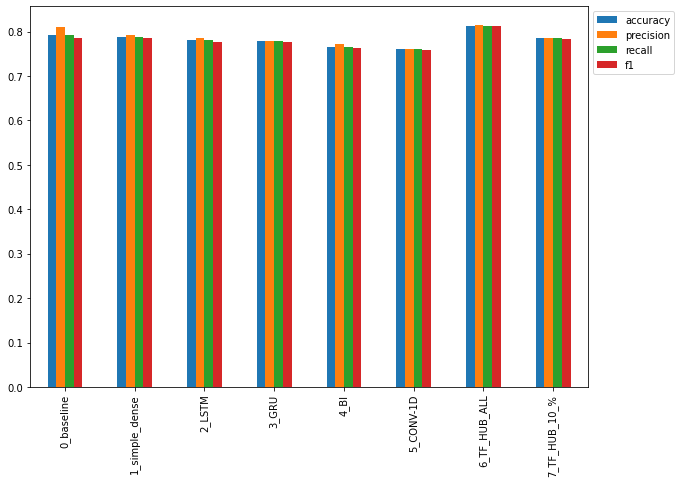

In [ ]:
## Plot and compare all of the models results

all_model_results.plot(kind='bar', figsize = (10, 7)).legend(bbox_to_anchor=(1.0, 1.0))

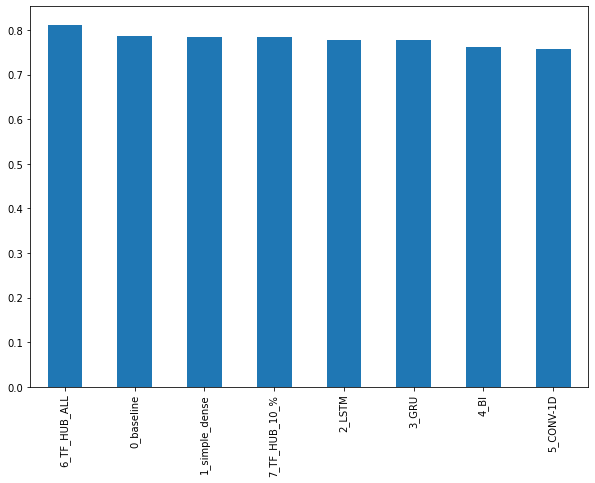

In [ ]:
# Sort model results by f1 score

all_model_results.sort_values('f1', ascending = False)['f1'].plot(kind = 'bar', figsize = (10, 7))

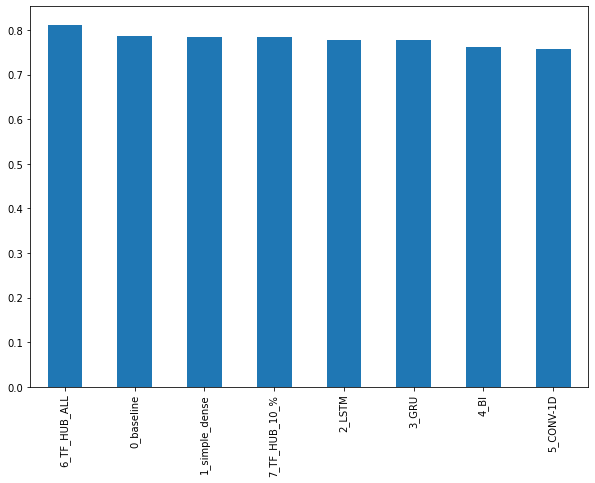

In [ ]:
all_model_results.sort_values('f1', ascending = False)['f1'].plot(kind = 'bar', figsize = (10, 7))

In [ ]:
!tensorboard dev upload --logdir ./model_logs \
  --name 'NLP modelling experiments' \
  --description 'Comparing Multiple Diff Types'  \
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=oLUIEsCIA6lJzGH5E0sKkmsNiu72UO&prompt=consent&access_type=offline


## Save and loading a trained model

Two formats to save a model

>`HDF5` format

>`SaveModel` format

In [ ]:
# save HDF5

model_6.save('model_6.h5')

# Load Model with custom hub layer
loaded_model_6 = tf.keras.models.load_model('model_6.h5',
                                            custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
# How does our loaded model perform

loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4281 - accuracy: 0.8136


[0.4281088411808014, 0.8136482834815979]

In [ ]:
# save SaveModel

model_6.save('model_6_SAVEDMODEL_format')
loaded_model_6 = tf.keras.models.load_model('model_6_SAVEDMODEL_format')


## Finding the most wrong examples

In [ ]:
val_df = pd.DataFrame({'text':  val_sentences,
                       'target': val_labels,
                       'pred' : model_6_preds,
                       'pred_probs': tf.squeeze(model_6_pred_probs)
                       })

In [ ]:
val_df

,text,target,pred,pred_probs
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.150007
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.741510
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.989143
3,@camilacabello97 Internally and externally scr...,1,0.0,0.188551
4,Radiation emergency #preparedness starts with ...,1,1.0,0.712807
...,...,...,...,...
757,That's the ultimate road to destruction,0,0.0,0.118185
758,@SetZorah dad why dont you claim me that mean ...,0,0.0,0.092258
759,FedEx will no longer transport bioterror patho...,0,1.0,0.851194
760,Crack in the path where I wiped out this morni...,0,1.0,0.658268


In [ ]:
# Finding the wrong prediction and sort by prediction probabilities
most_wrong = val_df[val_df['target'] != val_df['pred']].sort_values('pred_probs', ascending = False)

In [ ]:
most_wrong.head()

,text,target,pred,pred_probs
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.899297
628,@noah_anyname That's where the concentration c...,0,1.0,0.854212
759,FedEx will no longer transport bioterror patho...,0,1.0,0.851194
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.847378
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.832454


In [ ]:
most_wrong.tail()

,text,target,pred,pred_probs
233,I get to smoke my shit in peace,1,0.0,0.047264
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.041225
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.039249
38,Why are you deluged with low self-image? Take ...,1,0.0,0.035117
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.029797


In [ ]:
# Check the falsst postives [predicted 1 when it should have been 0]

for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_prob = row
  print(f'Target:{target}, Pred: {pred}, Prob: {pred_prob}')
  print(f'Text: \n{text}\n')
  print(f'------\n')

Target:0, Pred: 1.0, Prob: 0.8992974758148193
Text: 
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

------

Target:0, Pred: 1.0, Prob: 0.8542121052742004
Text: 
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

------

Target:0, Pred: 1.0, Prob: 0.851194441318512
Text: 
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

------

Target:0, Pred: 1.0, Prob: 0.847377598285675
Text: 
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

------

Target:0, Pred: 1.0, Prob: 0.8324535489082336
Text: 
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

------

Target:0, Pred: 1.0, Prob: 0.8187073469161987
Text: 
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

------



In [ ]:
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_prob = row
  print(f'Target:{target}, Pred: {pred}, Prob: {pred_prob}')
  print(f'Text: \n{test_sample}\n')
  print(f'------\n')

Target:1, Pred: 0.0, Prob: 0.06406304985284805
Text: 
VICTORINOX SWISS ARMY DATE WOMEN'S RUBBER MOP WATCH 241487 http://t.co/yFy3nkkcoH http://t.co/KNEhVvOHVK

------

Target:1, Pred: 0.0, Prob: 0.061821646988391876
Text: 
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

------

Target:1, Pred: 0.0, Prob: 0.060019832104444504
Text: 
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

------

Target:1, Pred: 0.0, Prob: 0.05551180988550186
Text: 
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

------

Target:1, Pred: 0.0, Prob: 0.052822135388851166
Text: 
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

------

Target:1, Pred: 0.0, Prob: 0.04726378619670868
Text: 
I get to smoke my shit in peace

------

Target:1, Pr

In [ ]:
test_df 

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


## Making predictions on the test dataset

In [ ]:
# Making predictions on the test dataset and visualising them

test_sentences = test_df['text'].to_list()
test_samples = random.sample(test_sentences, 10)

for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample]))
  pred = tf.round(pred_prob)
  print(f'Pred:{int(pred)}, Prob:{pred_prob}')
  print(f'Text:\n{test_sample}\n')
  print(f'------\n')

Pred:1, Prob:0.949220597743988
Text:
The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/ATokCD74bA

------

Pred:1, Prob:0.6587494611740112
Text:
Photoset: hookier: New stills from The Dust Storm (x) http://t.co/h8YjcFG8hv

------

Pred:0, Prob:0.11415968835353851
Text:
Bloody nurses waking me up just when I eventually fall asleep lol #Hospital

------

Pred:1, Prob:0.9823669195175171
Text:
Officer Wounded Suspect Killed in Exchange of Gunfire http://t.co/HHSjnAVHUA

------

Pred:0, Prob:0.30570825934410095
Text:
Texas Seeks Comment on Rules for Changes to Windstorm Insurer http://t.co/SDZLVBiFbN

------

Pred:1, Prob:0.9837618470191956
Text:
Deadly suicide bombing hits mosque in Saudi Arabia: A suicide bomber has blown himself up at a mosque in the s... http://t.co/RkvU3xjAzH

------

Pred:1, Prob:0.5161922574043274
Text:
That stadium blew up!!

------

Pred:1, Prob:0.9275608658790588
Text:
Grandma's friends survived to the attack in Hiroshima but they

In [ ]:
test_sample.s

'Swansea ?plot hijack transfer move for Southampton target Virgil van Dijk? http://t.co/PYL26NFEn8'

In [ ]:
model_6.predict(['The Tsuanmi wiped the entire state off the map'])

array([[0.8837686]], dtype=float32)


##The speed/score tradeoff

In [ ]:
# Lets make a functin to measure the time of prediction

import time

def pred_timer(model, samples):
  start_time = time.perf_counter()
  model.predict(samples)
  end_time = time.perf_counter()
  total_time = end_time-start_time
  time_per_pred = total_time/len(samples)
  return total_time, time_per_pred

In [ ]:
# Calculate TF hub time per pred

model_6_total_pred_time, model_6_time_per_pred = pred_timer(model = model_6,
                                                            samples = val_sentences)

model_6_total_pred_time, model_6_time_per_pred

(0.25336707000042225, 0.0003325027165359872)

In [ ]:
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.035990153000057035, 4.7231171916085347e-05)

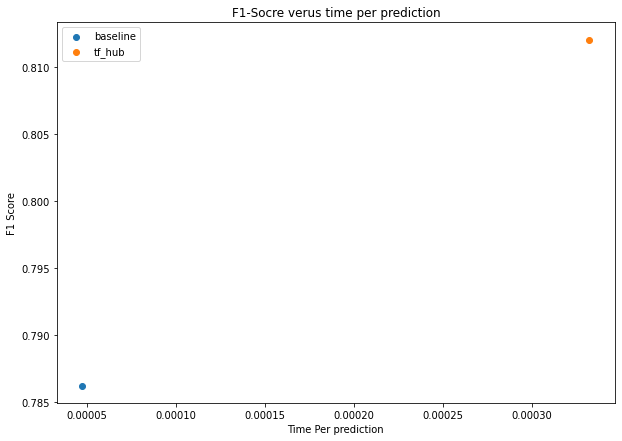

In [ ]:
# Get results for pretrained GS model

import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7))
plt.scatter(baseline_time_per_pred, baseline_results['f1'], label = 'baseline')
plt.scatter(model_6_time_per_pred, model_6_results['f1'], label = 'tf_hub')
plt.xlabel('Time Per prediction')
plt.ylabel('F1 Score')
plt.title('F1-Socre verus time per prediction')
plt.legend()